<a href="https://colab.research.google.com/github/khushboo0824/cognitive-assessment-/blob/main/cognitive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"khushboochauhan08","key":"1f0a8cdbb234c5e6b881934f26aac3f1"}'}

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d lukechugh/best-alzheimer-mri-dataset-99-accuracy


Dataset URL: https://www.kaggle.com/datasets/lukechugh/best-alzheimer-mri-dataset-99-accuracy
License(s): ODbL-1.0
 94% 67.0M/71.5M [00:00<00:00, 126MB/s]
100% 71.5M/71.5M [00:00<00:00, 112MB/s]


In [5]:
import zipfile

dataset_path = "/content/best-alzheimer-mri-dataset-99-accuracy.zip"
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("/content/MRI_Dataset")


In [7]:
import os
os.listdir("/content/MRI_Dataset/CombinedDataset/train")
os.listdir("/content/MRI_Dataset/CombinedDataset/test")

['Very Mild Impairment',
 'Mild Impairment',
 'Moderate Impairment',
 'No Impairment']

In [8]:
train_dir = "/content/MRI_Dataset/CombinedDataset/train"
test_dir = "/content/MRI_Dataset/CombinedDataset/test"


PRE-PROCESSING

In [10]:
IMG_SIZE = 224  # Ensure this is an integer
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Splitting train data into training & validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),  # FIXED
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),  # FIXED
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)



Found 8192 images belonging to 4 classes.
Found 2048 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [12]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Regularization to prevent overfitting
    layers.Dense(4, activation='softmax')  # 4 classes (mild, moderate, no, very mild impairment)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 690s 3s/step - accuracy: 0.2738 - loss: 1.4455 - val_accuracy: 0.4717 - val_loss: 1.2228
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 736s 3s/step - accuracy: 0.5009 - loss: 1.0688 - val_accuracy: 0.7031 - val_loss: 0.6642
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 708s 3s/step - accuracy: 0.6562 - loss: 0.7358 - val_accuracy: 0.6978 - val_loss: 0.6615
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 710s 3s/step - accuracy: 0.6961 - loss: 0.6547 - val_accuracy: 0.7168 - val_loss: 0.5622
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 702s 3s/step - accuracy: 0.7157 - loss: 0.6224 - val_accuracy: 0.7183 - val_loss: 0.5917
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 698s 3s/step - accuracy: 0.7293 - loss: 0.6025 - val_accuracy: 0.7080 - val_loss: 0.5390
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 704s 3s/step - accuracy: 0.7461 - loss: 0.5703 - val_accuracy: 0.6943 - val_loss: 0.5548
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 705s 3s/step - accuracy: 0.7566 - loss: 0.5509 - val_accu

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

model.fit(train_generator,
          epochs=5,  # You can extend up to 15
          validation_data=validation_generator,
          callbacks=[early_stop])


Epoch 1/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 704s 3s/step - accuracy: 0.7516 - loss: 0.5507 - val_accuracy: 0.6743 - val_loss: 0.6130
Epoch 2/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 705s 3s/step - accuracy: 0.7651 - loss: 0.5404 - val_accuracy: 0.6895 - val_loss: 0.5755
Epoch 3/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 697s 3s/step - accuracy: 0.7690 - loss: 0.5160 - val_accuracy: 0.6968 - val_loss: 0.5971
Epoch 4/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 690s 3s/step - accuracy: 0.7684 - loss: 0.5085 - val_accuracy: 0.6802 - val_loss: 0.5789
Epoch 5/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 691s 3s/step - accuracy: 0.7611 - loss: 0.5267 - val_accuracy: 0.6953 - val_loss: 0.5721


In [17]:
model.save("mri_classification_model.h5")  # Saves the model in HDF5 format


In [23]:
model.save('mri_model.keras')  # Saves in TensorFlow's SavedModel format


In [24]:
from tensorflow.keras.models import load_model
model = load_model('mri_model.keras')


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [25]:
model.evaluate(test_generator)


40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 656ms/step - accuracy: 0.5509 - loss: 0.9026


[0.8795410394668579, 0.5676309466362]

40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 692ms/step


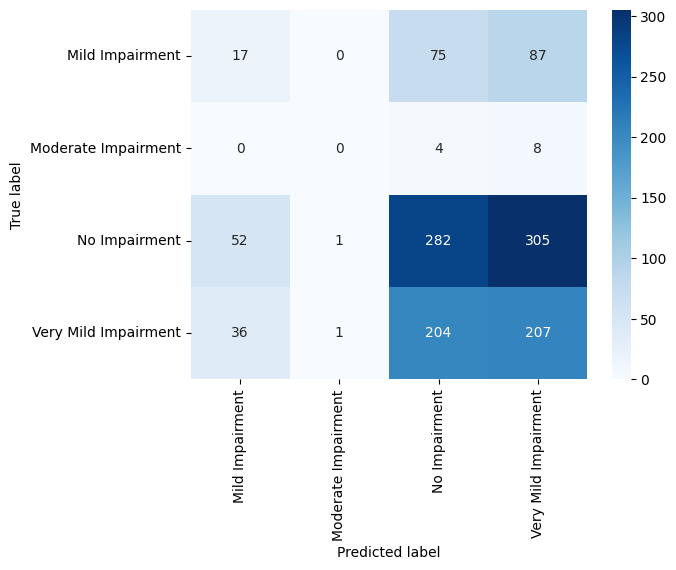

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
